###  Medical Object Classification Final Project
* John Munoz
* 03/08/2024
* MSDS686 Deep Learning

### Overview of Medical Object Classification Project
> **For my Final Project I decided to build an Neural Network Classification Model that could predict ten medical objects used in an healthcare setting**.
* The goal was to use Convolutional Neural Networks, Pretrained Models, and Transfer Learning to classify medical objects.
* The objective is to try out different models and select the model that has the highest accuracy at predicting medical objects.
* Instead of using a dataset on Kaggle I decided to scrape images from google,roboflow, and images from YouTube videos.
* Currently, on roboflow or kaggle there isn't a dataset that has the exact medical objects I wanted to classify.
* For instance, on roboflow they have datasets on facemask,gloves, and hospital beds but I haven't found any that combines all of the class labels im interested in classifiying.
* The end goal is to build a highly accurate classifier that can classify medical objects and generalize well to new medical objects.

### Description of data
* I was interested in classifying the following objects:
* faceshield,facemask,glasses,gloves,hairnet,hospital_bed,medical_instrument,monitor,operatinglights, and scrubs.
* I scraped data from google using python packages and acquired data from different roboflow project images.
* When acquiring data I was interested in obtaining images that showed exactly one specific object from an particular class.
* Since this is a classification project and not object detection, it was critical to eliminate photos that had multiple objects in them.
* Due to the project scope timeline, I only acquired around 1,000 images from each class. The total amount of images were around 10,0000.
* The images did contain different shapes and image formats, and that was handled during the data prep phase of the project.
* **Note** all of the data prep and image folders wereperformed on my local computer, but the modeling and Analysis was performed on Google Colab
* In the Summary of methods section, I provided the code that I used to load the data into google colab.
* I uploaded the data into google colab under a folder called data_project.
* The data_project folder contained all of data for this image classification project.



### Summary of methods
* The first step in the project was to get the data into an workable format.
* The following image below shows the initial data. Each class contained a separate folder.
* To use the keras function image_dataset_from_directory I needed to label each photo as **classlabel.imgnumber.jpg**
* The code performed on my local computer called Pre Process Data does this for each image category.
* This was necessary because each image was called a different name and wasn't in any exact order.
* The next steps was to take each class folders clean version and move it into one main folder called all_data.
* Finally, the last step was to create a main folder called project_data that holds the training, testing and validation data.
* Since I only had 1,000 images for each class I used 700 for the training, 200 for the validation and only 100 for the testing.
* Each class has there own folder inside a training, testing and validation section.
* Once the data was in the correct format I uploaded all the data into google colab



### Working in Colab
* Once I loaded all 10,000 images into google colab I was ready to start building models
* Though, before building any model its useful to get a sense of what you're data looks like
* I created a dictionary called class_mapping that was useful in understand what class each prediction belongs to
> {'facemask': 0,
 'faceshield': 1,
 'glasses': 2,
 'gloves': 3,
 'hairnet': 4,
 'hospital_bed': 5,
 'medical_instrument': 6,
 'monitor': 7,
 'operatinglights': 8,
 'scrubs': 9}



 * I created a function called show_image that shows what the different classes of images look like
 * As shown in the images each image has differn't lengths and pixel depth
 * To solve this issue and to get the data into a modeling format.
 * I used the keras function image_dataset_from_directory
 * The function resized every image to 224,224
 * The reason for this is most pretrained models need to be in a smiliar image size as 224,224
 * Due to the low amount of data I decided to use a batch_size of 16
 * Finally I had my training data that was used to build differn't models. My validation and testing data was used to monitor differn't models performance.
 * Since the data was in batches, I printed out the first 3 batches of data showing what the images looked like and the corresponding class labels.
 * The class mapping dictioanry is very useful in order to tell for instance 0 belongs to a facemask or 9 belongs to scrubs.
 * Now the data is ready for modeling the next section will dicuss the summary of the differn't models built to predict these ten differn't medical objects.


### Model Summary
**Model 1: Base Model**
* For all the models I used a keras layer to Rescale the data.
* In addition, for Model 1 I used a Convolutional Neural Network with maxpooling Levels
* I used a mix of 32,64,128, and 256 filters. I also set the kernel_size to 3.
* The output layer was a dense 10 for ten classes with a softmax output level
* For the optimizer I used rmsprop, and sparse_categorical_crossentropy for loss
* When fitting the model, I used an epochs of 5, to get a sense of how long it would take to run models in colab.
* The base model tends to overfit after 4 epochs
* The base model had an accuracy of .482
* I built a function called predict_image that predicts the image class

**Model 2: Using Additional Epochs**
* for Model 2 I used a Convolutional Neural Network with Maxpooling Levels
* I used a mix of 32,64,128, and 256 filters. I also set the kernel_size to 3.
* The output layer was a dense 10 for ten classes with a softmax output level
* For the optimizer I used rmsprop, and sparse_categorical_crossentropy for loss, and accuracy for the evaluation metric.
* When fitting the model I used an epochs of 10.
* Model 2 tends to overfit after 7 epochs.
* Model 2 had a better accuracy of .62

**Model 3: Using 30 Epochs**
* For Model 3 I used a Convolutional Neural Network with Maxpooling Levels
* I used a mix of 32,64,128, and 256 filters. I also set the kernel_size to 3.
* The output layer was a dense 10 for ten classes with a softmax output level
* For the optimizer I used rmsprop, and sparse_categorical_crossentropy for loss, and accuracy for the metric.
* When fitting the model, I used an epochs of 30.
* I was interested in seeing if increasing the epochs to 30 would lead to a better accuracy.
* Though, for every increase in the number of epochs the compute time dramatically increased in google colab.
* Model 3 tends to overfit after 25 epochs
* Increasing the epochs to 30 resulted in a drop in accuracy
* Model 3 had a accuracy of .56


**Model 4: Using Dropout**
* For Model 4 I used a Convolutional Neural Network with Maxpooling Levels, and Dropout Layers
* Dropout helps with reducing overfitting in Neural Network models.
* I used a mix of 32,64,128, and 256 filters. I also set the kernel_size to 3.
* For each layer I used 2 conv2d networks.
* The output layer was a dense 10 for ten classes with a softmax output level
* For the optimizer I used rmsprop, and sparse_categorical_crossentropy for loss, and accuracy for the metric.
* When fitting the model, I used an epochs of 10.
* Model 4 had an accuracy of .59

**Model 5: Data Augmentation**
* For model 5 I implemented Data augmentation
* I used the following augmentaion via keras
>       layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
        layers.RandomContrast(0.1),
        layers.RandomBrightness(0.1),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),



* The first layer was the data augmentation applied to every image of the input data
* The next layer was the rescaling layer.
* In addition, for Model 5 I used an Convolutional Neural Network with Maxpooling Levels
* I used a mix of 32,64,128,and 256 filters. I also set the kernel_size to 3.
* I added an Dropout layer after the data was flatten
* The output layer was a dense 10 for ten classes with an softmax output level
* For the optimizer I used rmsprop, and sparse_categorical_crossentropy for loss, and accuracy for the metric.
* When fitting the model I used an epochs of 35.
* The loss was all over the place, and seemed lowest at 24 epochs
* Model 5 had an accuracy of .59

**Model 6: Using VGG16 Pretrained Model**
* For Model 6 I used VGG16 Pretrained model along with data augmentation.
* The V6616 pretrained model is a cnn neural network that was trained on ImageNet dataset,
* I set the vgg16 model trainable to false meaning the parameter weights should not be updated during the training process.
* The first layer was the data_augmentation followed by the rescaling layer.
* I then applied the vgg16 model, and added an final dropout layer.
* For the optimizer I used rmsprop, and sparse_categorical_crossentropy for loss, and accuracy for the metric.
* I used ten epochs to fit the model
* Model 6 had an accuarcy of .84


**Model 7: Using VGG Pretrained Model and freezing the last two layer**
* For model 7 I left the last two layer to be able to  train on the data.
* For model 7 I set the epochs to 15
* Model 7 had an accuracy of .87


**Model 8: Using Resnet50 Pretrained Model**
* For Model 8 I used an Resnet50 pretrain model
* Similar to v6616 I set trainable to false
* The first layer was the data_augmentation followed by the rescaling layer.
* I then applied the Resnet50 model, and added  a final dropout layer
* For the optimizer I used rmsprop, and sparse_categorical_crossentropy for loss, and accuracy for the metric.
* I used 15 epochs to fit the model
* Model 8 had an accuarcy of .26 and was the worst performing model


**Model 9: Inception v3**
* For Model9 I used an Inception V3 pretrain model
* Similar to vgg16 I set trainable to false
* The first layer was the data_augmentation followed by the rescaling layer
* I then applied the Inceptionv3 model, and added an dropout  dropout layer
* For the optimizer I used rmsprop, and sparse_categorical_crossentropy for loss, and accuracy for the metric.
* I used 20 epochs to fit the model
* Model 9 had an accuarcy of .93


**Model 10: Inception v3 tune**
* For model10 I left the last two layer to be able to train on the dataset.
* For model 10 I set the epochs to 30
* Model 10 had an accuracy of .92


### Analysis:
* Overall, I was really happy with the model’s performance.
* Going from an accuracy to .48 to .93 is an dramatic improvement
* Due to the limited amount of training images, I was really surprised by the high accuracy.
* Model Comparison Chart shows how each model performed.
* Model 9 the pretrained Inception model performed the best at an 93% Accuracy.
* I created a function called predict_images_in_folder that used images from pexels.com to test the models performance.
* I used 25 images from pexls.com to test different classes of the data
* Overall its doing a really good job at predicting images but did predict an facemask as an hairnet.
* Finally, I created a confusion matrix to evaluate the test data.
* Some classes its doing a great job at predicting classes {Facemask,gloves, hairnet,monitor}
* Though, its doing worse on the following classes:       { faceshield, glasses, and medical instruments}
* In conclusion I’m really happy with my model’s performance, especially with the low amount of training data


![picture](https://drive.google.com/uc?id=1qxLavgw0q4v6AyBfuBkXfjMjnieNNizI)

![picture](https://drive.google.com/uc?id=13lIINkQWbOHw_p9rXyxZ6ppu8vBPL2lX)

![picture](https://drive.google.com/uc?id=1plXB1KzLSnXqgJhUgnkZiXEUn3OUbLLV)

![picture](https://drive.google.com/uc?id=1nT81QR2ex58rJcqrvyJFv7pploikEW3F)

![picture](https://drive.google.com/uc?id=1rFzsNryQJm3reA-S9aaYiD2YVntsx-OA)

###

In [ ]:
### Pre Process Data  Script done on my local Computer
#import os
#import shutil
#import glob
#import pathlib
#ls
#pwd
#faceshield= os.listdir("face_shield")
#faceshield[0:5]
#len(faceshield)
#folder_path = 'face_shield'
#clean_folder_path = 'face_shield_clean'
#os.makedirs(clean_folder_path, exist_ok=True)
#files = os.listdir(folder_path)
#image_files = [file for file in files if file.lower().endswith(('.jpg', '.png','.jpeg'))]
#len(image_files)
#image_files.sort()
#image_files[0:5]
#for row, file_name in enumerate(image_files):
     #new_file_name = f'faceshield.{row}.jpg'
     #old_file_path = os.path.join(folder_path, file_name)
     #new_file_path = os.path.join(clean_folder_path, new_file_name)
     #os.rename(old_file_path, new_file_path)
     #shutil.move(new_file_path, os.path.join(clean_folder_path, new_file_name))
#print("Files renamed and moved to 'face_shield_clean' folder.")

#def rename_files(folder_name="facemask",folder_clean="facemask_clean"):
    #folder_path = folder_name
    #print(folder_path)
    #clean_folder_path = folder_clean
    #os.makedirs(clean_folder_path, exist_ok=True)
    #files = os.listdir(folder_path)
    #image_files = [file for file in files if file.lower().endswith(('.jpg', '.png','.jpeg'))]
    #print(len(image_files))
    #image_files.sort()
    #for row, file_name in enumerate(image_files):
        #new_file_name = f'{folder_name}.{row}.jpg'
        #old_file_path = os.path.join(folder_path, file_name)
        #new_file_path = os.path.join(clean_folder_path, new_file_name)
        #os.rename(old_file_path, new_file_path)
        #shutil.move(new_file_path, os.path.join(clean_folder_path, new_file_name))
    #print(f" Files renamed and moved to {clean_folder_path} folder.")
    #amount_fil=os.listdir(clean_folder_path)
    #print(len(amount_fil))
    #return True
#face_mask_done=rename_files(folder_name="facemask",folder_clean="facemask_clean")
#glasses_done=rename_files(folder_name="glasses",folder_clean="glasses_clean")
#gloves_done=rename_files(folder_name="gloves",folder_clean="gloves_clean")
#hair_done=rename_files(folder_name="hairnet",folder_clean="hairnet_clean")
#bed_done=rename_files(folder_name="hospital_bed",folder_clean="hospital_bed_clean")
#operating_room_done=rename_files(folder_name="operatinglights",folder_clean="operatinglights_clean")
#monitor_done=rename_files(folder_name="monitor",folder_clean="monitor_clean")
#scrubs_done=rename_files(folder_name="scrubs",folder_clean="scrubs_clean")
#faceshield_done=rename_files(folder_name="faceshield",folder_clean="faceshield_clean")
#medical_inst=rename_files(folder_name="medical_instrument",folder_clean="medical_instrument_clean")


#main_directory_path = 'c:\\Users\\johnm\\images_project'
#subdirectories = [d for d in os.listdir(main_directory_path) if os.path.isdir(os.path.join(main_directory_path, d))]
#for subdirectory in subdirectories:
    #subdirectory_path = os.path.join(main_directory_path, subdirectory)
    #files_in_subdirectory = os.listdir(subdirectory_path)
    #print(f"Folder: {subdirectory}, Number of Files: {len(files_in_subdirectory)}")

#folders = [
    #face_shield_clean',
    #'facemask_clean',
    #'glasses_clean',
    #'gloves_clean',
    #'hairnet_clean',
    #'hospital_bed_clean',
    #'medical_instrument_clean',
    #'monitor_clean',
    #'operatinglights_clean'
#]

#dp = 'all_data'
#os.makedirs(dp, exist_ok=True)
#for row in folders:
    #sp = os.path.join(os.getcwd(), folders)
    #files = os.listdir(sp)
    #for file in files:
        #source_file_path = os.path.join(sp, file)
        #destination_file = os.path.join(dp, file)
        #shutil.move(source_file_path, destination_file)

#all_categories =[
#'faceshield',
#'facemask',
#'glasses',
#'gloves',
#'hairnet',
#'hospital_bed',
#'medical_instrument',
#'monitor',
#'operatinglights',
#'scrubs']

#for row in all_categories:
    #print(row)

#class_mapping = {category: index for index, category in enumerate(sorted(all_categories))}
#numeric_labels = list(range(len(all_categories)))
#class_mapping

#df="all_data"
#df=os.listdir(df)
#len(df)
#ds="all_data"
#search_pattern="scrubs*"
#scrub_files=glob.glob(f'{ds}/{search_pattern}')
#scrub_files[0:5]


#original_dir = pathlib.Path("all_data")
#new_base_dir = pathlib.Path("project_data")



#def make_subset(subset_name, start_index, end_index):
#    for category in all_categories:
#        dir = new_base_dir / subset_name / category
#        os.makedirs(dir, exist_ok=True)
#        for i in range(start_index, end_index):
#            fname = f"{category}.{i}.jpg"
#           shutil.copyfile(src=os.path.join(original_dir, fname),
#                            dst=os.path.join(dir, fname))

#make_subset("train", start_index=0, end_index=700)
#make_subset("validation", start_index=700, end_index=900)
#make_subset("test", start_index=900, end_index=1000)

In [ ]:
from tensorflow import keras
import pandas as pd
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory
import os, shutil # Library for navigating files
from keras import backend as K
from keras import backend, models, layers, optimizers, regularizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from IPython.display import display # Library to help view images
from PIL import Image # Library to help view images
from keras.preprocessing.image import ImageDataGenerator # Library for data augmentation
from keras.preprocessing import image
import os, shutil, pathlib
import cv2
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
np.random.seed(1)

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:

%cd /content/drive/MyDrive/Deep_learning_project/project_data
!ls

/content/drive/MyDrive/Deep_learning_project/project_data
cdata.png					 inception_base_final.h5     project_scope.png
convnet_base.keras				 inception_base.keras	     res_base.keras
convnet_base_model.keras			 inception_base_TUNE.keras   test
convnet_from_scratch_with_augmentation.keras	 inception_final.h5	     test_data_internet
convnet_with_dropout.keras			 last_p.png		     train
feature_extraction_with_data_augmentation.keras  project_data._outlook..png  Untitled0.ipynb
feature_extraction_with_tune_two.keras		 project_outlook.png	     validation


In [ ]:
!pwd

/content/drive/MyDrive/Deep_learning_project/project_data


In [ ]:
np.random.seed(1)
all_categories =[
'faceshield',
'facemask',
'glasses',
'gloves',
'hairnet',
'hospital_bed',
'medical_instrument',
'monitor',
'operatinglights',
'scrubs']

for row in all_categories:
    print(row)

faceshield
facemask
glasses
gloves
hairnet
hospital_bed
medical_instrument
monitor
operatinglights
scrubs


In [ ]:
class_mapping = {category: index for index, category in enumerate(sorted(all_categories))}
numeric_labels = list(range(len(all_categories)))
class_mapping

{'facemask': 0,
 'faceshield': 1,
 'glasses': 2,
 'gloves': 3,
 'hairnet': 4,
 'hospital_bed': 5,
 'medical_instrument': 6,
 'monitor': 7,
 'operatinglights': 8,
 'scrubs': 9}

In [ ]:
def show_image(img_loc='/content/drive/MyDrive/Deep_learning_project/project_data/train/glasses/glasses.288.jpg'):
    single_img=img_loc
    print(type(single_img))
    single=cv2.imread(single_img)
    plt.imshow(single[:,:,::-1])

<class 'str'>


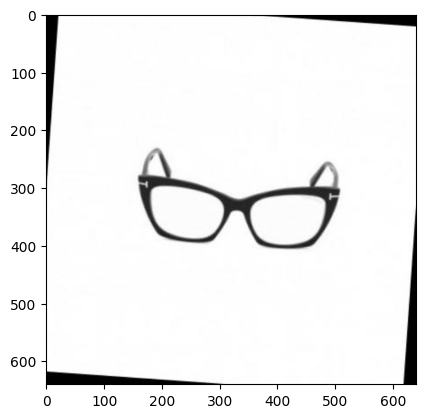

In [ ]:
show_image()

<class 'str'>


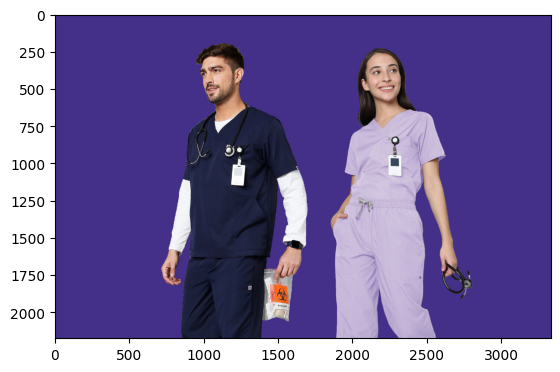

In [ ]:
show_image(img_loc='/content/drive/MyDrive/Deep_learning_project/project_data/train/scrubs/scrubs.288.jpg')

<class 'str'>


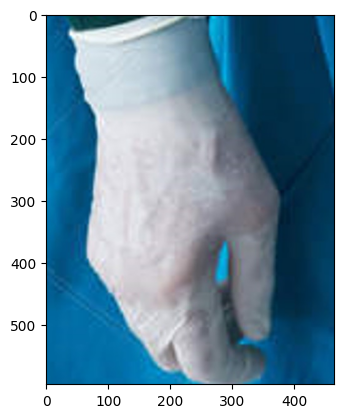

In [ ]:
show_image(img_loc='/content/drive/MyDrive/Deep_learning_project/project_data/train/gloves/gloves.202.jpg')

In [ ]:
new_base_dir = pathlib.Path('/content/drive/MyDrive/Deep_learning_project/project_data')
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(224, 224),
    batch_size=16)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(224, 224),
    batch_size=16)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(224, 224),
    batch_size=16)


Found 7000 files belonging to 10 classes.
Found 2000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (16, 224, 224, 3)
labels batch shape: (16,)


In [ ]:
for data_batch, labels_batch in train_dataset:
  print(labels_batch)
  break

tf.Tensor([1 4 2 5 5 6 2 0 6 3 1 0 0 6 6 3], shape=(16,), dtype=int32)


In [ ]:
class_mapping

{'facemask': 0,
 'faceshield': 1,
 'glasses': 2,
 'gloves': 3,
 'hairnet': 4,
 'hospital_bed': 5,
 'medical_instrument': 6,
 'monitor': 7,
 'operatinglights': 8,
 'scrubs': 9}

tf.Tensor([0 3 0 5 8 4 2 3 8 7 3 5 1 5 9 9], shape=(16,), dtype=int32)


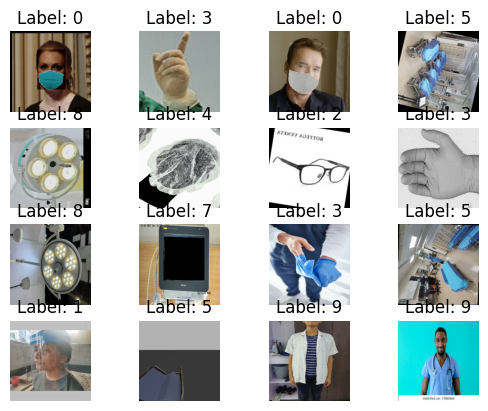

tf.Tensor([5 2 1 0 2 4 6 6 7 8 1 6 2 0 3 1], shape=(16,), dtype=int32)


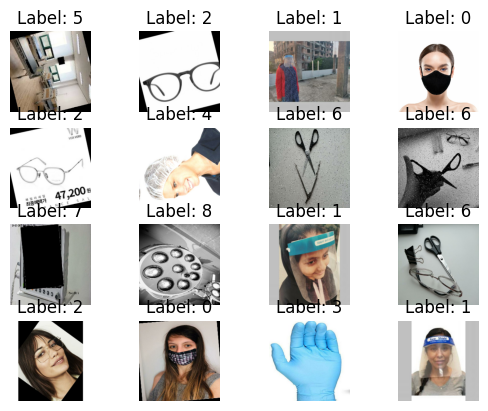

tf.Tensor([6 3 3 4 7 9 6 0 3 4 1 6 1 6 6 3], shape=(16,), dtype=int32)


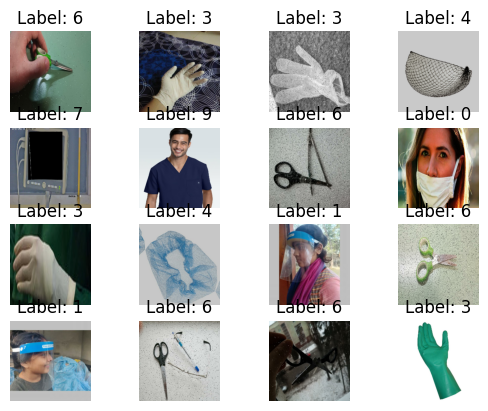

In [ ]:
x = 0
j=0

for data_batch, labels_batch in train_dataset:
    print(labels_batch)
    for i in range(len(data_batch)):
        sings = data_batch[i]
        numpy_array = sings.numpy()
        numpy_array = numpy_array.astype('uint8')

        labs = labels_batch[i]
        value = labs.numpy()

        # Plot the image in a subplot
        plt.subplot(4, 4, x + 1)  # Assuming 16 images, creating a 4x4 grid
        plt.imshow(numpy_array)
        plt.title(f"Label: {value}")
        plt.axis('off')  # Turn off axis labels for better visibility

        x += 1
    plt.show()
    x=0
    j+=1

    if j >2 :
        break

In [ ]:
## Model 1 Base Model
inputs = keras.Input(shape=(224, 224, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                        

In [ ]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_base_model.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/5
438/438 [==============================] - 1874s 4s/step - loss: 1.6675 - accuracy: 0.4284 - val_loss: 1.9580 - val_accuracy: 0.5200
Epoch 2/5
438/438 [==============================] - 63s 143ms/step - loss: 0.8651 - accuracy: 0.7153 - val_loss: 1.3800 - val_accuracy: 0.6290
Epoch 3/5
438/438 [==============================] - 67s 152ms/step - loss: 0.6283 - accuracy: 0.7913 - val_loss: 1.5413 - val_accuracy: 0.6560
Epoch 4/5
438/438 [==============================] - 61s 138ms/step - loss: 0.4672 - accuracy: 0.8463 - val_loss: 1.3244 - val_accuracy: 0.6950
Epoch 5/5
438/438 [==============================] - 63s 141ms/step - loss: 0.3618 - accuracy: 0.8843 - val_loss: 2.5955 - val_accuracy: 0.6270


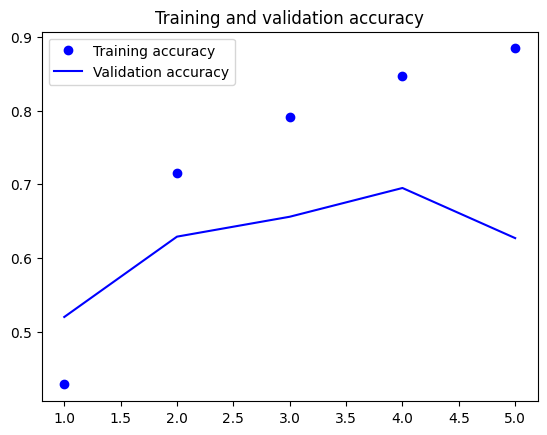

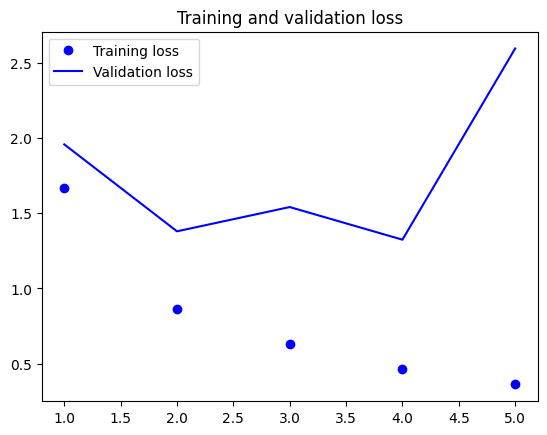

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 231s 3s/step - loss: 5.6383 - accuracy: 0.4820
Test accuracy: 0.482


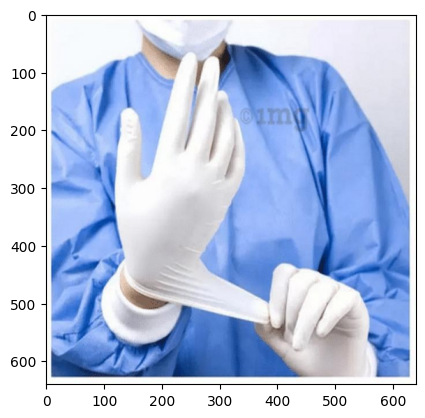

In [ ]:
ds='/content/drive/MyDrive/Deep_learning_project/project_data/test/gloves/gloves.904.jpg'
ds_sample=cv2.imread(ds)
plt.imshow(ds_sample[:,:,::-1])

In [ ]:
img = load_img(ds, target_size=(224, 224))

In [ ]:
img = img_to_array(img)
img

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.]],

       ...,

       [[253., 254., 255.],
        [254., 254., 252.],
        [254., 255., 247.],
        ...,
        [255., 254., 249.],
        [255., 254., 250.],
        [253., 254., 255.]],

       [[253., 255., 252.],
        [254., 255., 250.],
        [254., 255., 249.],
        ...,
        [255., 254., 250.],
        [254., 254., 252.],
        [253., 254., 255.]],

       [[254., 255., 249.],
        [253., 255., 252.],
        [253., 2

In [ ]:
img = img.reshape(1, 224, 224, 3)
img = img.astype('float32')

In [ ]:
result = model.predict(img)
result

1/1 [==============================] - 0s 451ms/step


array([[1.7553972e-14, 9.6988838e-15, 3.5935326e-17, 9.9773669e-01,
        5.9188392e-09, 1.6515932e-06, 4.6286067e-10, 9.3375456e-07,
        2.2607124e-03, 9.7042427e-09]], dtype=float32)

In [ ]:
np.argmax(result)

3

In [ ]:
class_mapping

{'facemask': 0,
 'faceshield': 1,
 'glasses': 2,
 'gloves': 3,
 'hairnet': 4,
 'hospital_bed': 5,
 'medical_instrument': 6,
 'monitor': 7,
 'operatinglights': 8,
 'scrubs': 9}

In [ ]:
def predict_image(ds='/content/drive/MyDrive/Deep_learning_project/project_data/test/facemask/facemask.900.jpg'):
    ds_sample=cv2.imread(ds)
    plt.imshow(ds_sample[:,:,::-1])
    img = load_img(ds, target_size=(224, 224))
    img = img_to_array(img)
    img = img.reshape(1, 224, 224, 3)
    img = img.astype('float32')
    result = model.predict(img)
    rtm=np.argmax(result)
    my_arr_percent = result * 100
    print(f"the model predicted class {rtm}")
    print("the probs were ")
    np.set_printoptions(precision=2, suppress=True)
    print(my_arr_percent)


1/1 [==============================] - 0s 18ms/step
the model predicted class 0
the probs were 
[[88.29  0.07  1.54  6.8   3.09  0.01  0.18  0.    0.    0.  ]]


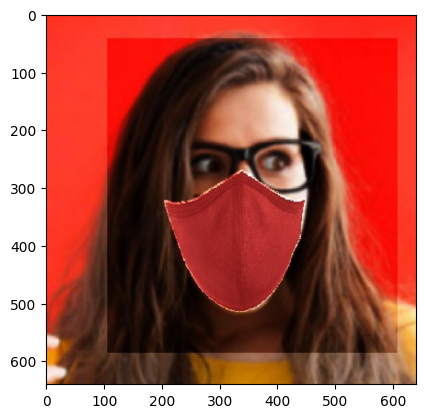

In [ ]:
predict_image()

1/1 [==============================] - 0s 36ms/step
the model predicted class 3
the probs were 
[[ 0.    0.    0.   99.77  0.    0.    0.    0.    0.23  0.  ]]


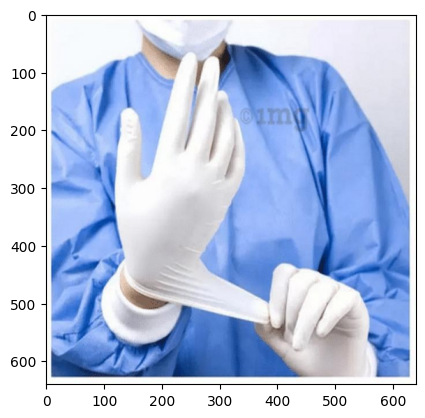

In [ ]:
predict_image('/content/drive/MyDrive/Deep_learning_project/project_data/test/gloves/gloves.904.jpg')

In [ ]:
### Model 2 setting Epochs to two
inputs = keras.Input(shape=(224, 224, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_base.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                      

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 9s 123ms/step - loss: 5.4297 - accuracy: 0.6170
Test accuracy: 0.617


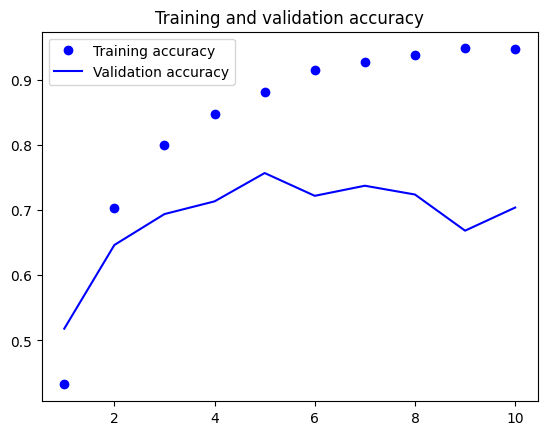

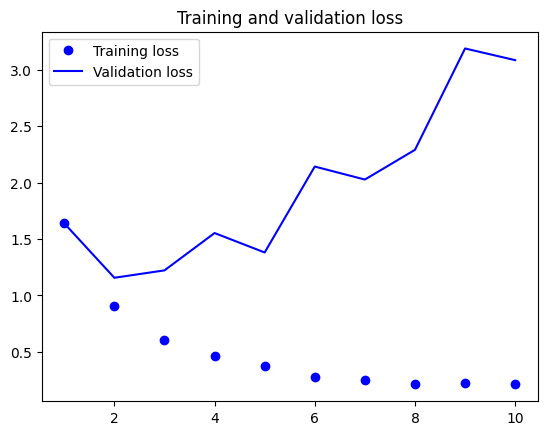

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 79ms/step
the model predicted class 3
the probs were 
[[ 0.   35.62  0.   64.33  0.05  0.    0.    0.    0.    0.  ]]


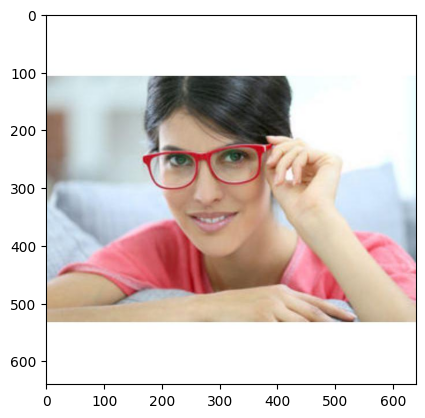

In [ ]:
predict_image('/content/drive/MyDrive/Deep_learning_project/project_data/test/glasses/glasses.904.jpg')

In [ ]:
### Model 3 Increase the epochs to 30
inputs = keras.Input(shape=(224, 224, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_base.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                      

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 8s 104ms/step - loss: 44.5854 - accuracy: 0.5660
Test accuracy: 0.566


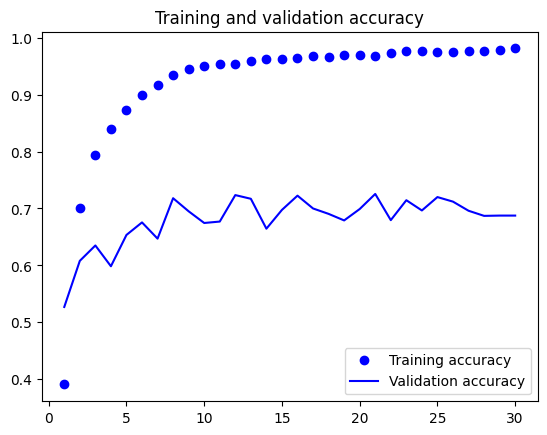

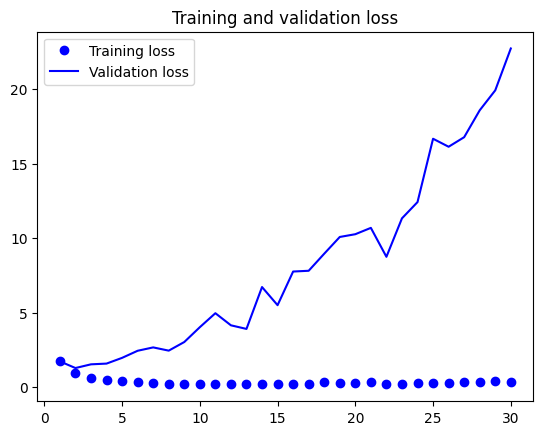

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 79ms/step
the model predicted class 4
the probs were 
[[  0.   0.   0.   0. 100.   0.   0.   0.   0.   0.]]


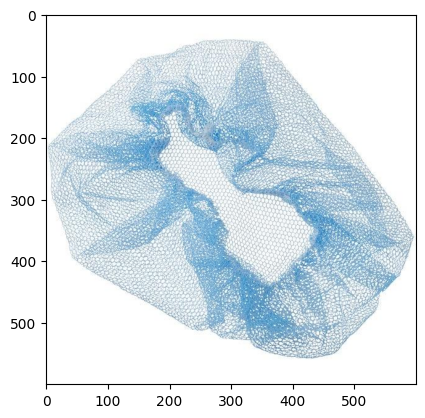

In [ ]:
predict_image('/content/drive/MyDrive/Deep_learning_project/project_data/test/hairnet/hairnet.904.jpg')

In [ ]:
### Model 4 Using Dropout
inputs = keras.Input(shape=(224, 224, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, padding='same',activation="relu")(x)
x = layers.Conv2D(filters=32, kernel_size=3, padding='same',activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x=  layers.Dropout(0.25)(x)

x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation="relu")(x)
x = layers.Conv2D(filters=64, kernel_size=3, padding='same',activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x=  layers.Dropout(0.25)(x)


x = layers.Conv2D(filters=128, kernel_size=3,padding='same', activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, padding='same',activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x=  layers.Dropout(0.25)(x)


x = layers.Conv2D(filters=256, kernel_size=3, padding='same', activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, padding='same',activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x=  layers.Dropout(0.25)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_with_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 112, 112, 32)      0         
                                                           

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 219s 3s/step - loss: 2.8567 - accuracy: 0.5930
Test accuracy: 0.593


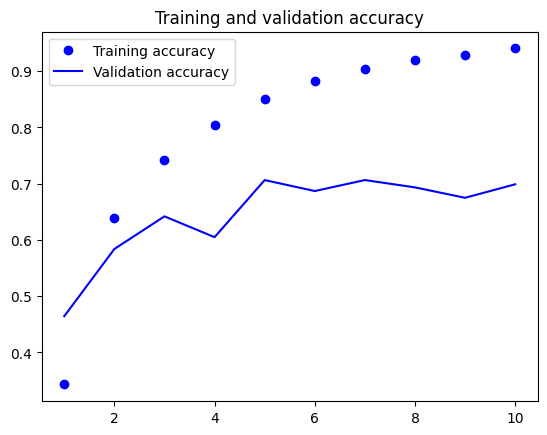

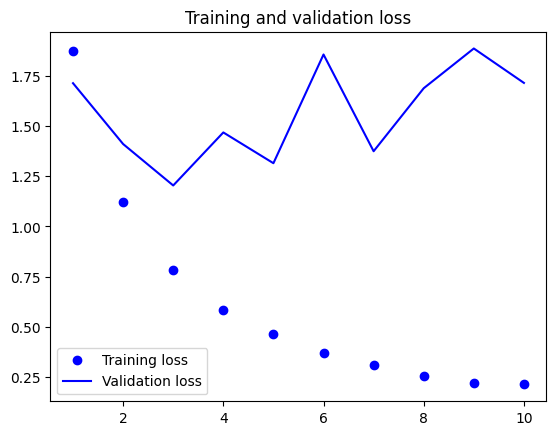

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 20ms/step
the model predicted class 9
the probs were 
[[  0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]]


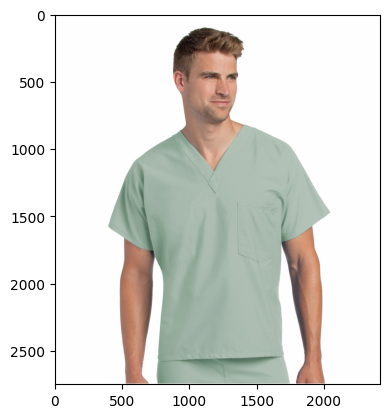

In [ ]:
predict_image('/content/drive/MyDrive/Deep_learning_project/project_data/test/scrubs/scrubs.950.jpg')

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
        layers.RandomContrast(0.1),
        layers.RandomBrightness(0.1),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),

    ]
)

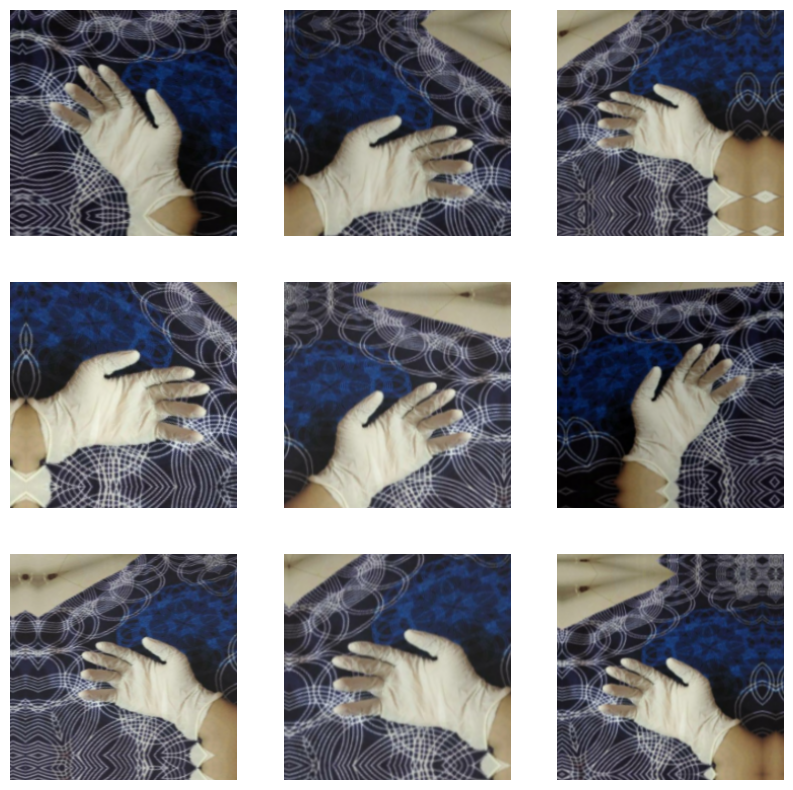

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
### Model 5 Using data Augmentation
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=35,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/35
438/438 [==============================] - 2017s 5s/step - loss: 1.9109 - accuracy: 0.3350 - val_loss: 1.8570 - val_accuracy: 0.4700
Epoch 2/35
438/438 [==============================] - 71s 160ms/step - loss: 1.4160 - accuracy: 0.5217 - val_loss: 2.3405 - val_accuracy: 0.5275
Epoch 3/35
438/438 [==============================] - 70s 158ms/step - loss: 1.1372 - accuracy: 0.6199 - val_loss: 1.5461 - val_accuracy: 0.5705
Epoch 4/35
438/438 [==============================] - 74s 168ms/step - loss: 0.9856 - accuracy: 0.6787 - val_loss: 1.4989 - val_accuracy: 0.6335
Epoch 5/35
438/438 [==============================] - 70s 158ms/step - loss: 0.9125 - accuracy: 0.6986 - val_loss: 1.3586 - val_accuracy: 0.6510
Epoch 6/35
438/438 [==============================] - 69s 155ms/step - loss: 0.8641 - accuracy: 0.7226 - val_loss: 1.6686 - val_accuracy: 0.6030
Epoch 7/35
438/438 [==============================] - 69s 155ms/step - loss: 0.8012 - accuracy: 0.7409 - val_loss: 1.2649 - val_acc

In [ ]:
class_mapping

{'facemask': 0,
 'faceshield': 1,
 'glasses': 2,
 'gloves': 3,
 'hairnet': 4,
 'hospital_bed': 5,
 'medical_instrument': 6,
 'monitor': 7,
 'operatinglights': 8,
 'scrubs': 9}

1/1 [==============================] - 0s 18ms/step
the model predicted class 8
the probs were 
[[ 0.    0.04  0.    0.    0.54  0.    0.    0.   99.41  0.  ]]


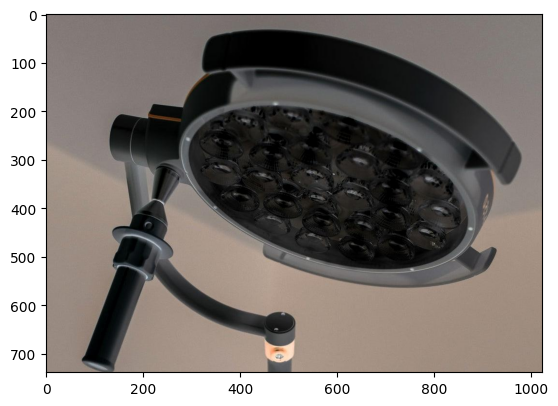

In [ ]:
predict_image('/content/drive/MyDrive/Deep_learning_project/project_data/test/operatinglights/operatinglights.900.jpg')

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 224s 3s/step - loss: 3.1581 - accuracy: 0.5910
Test accuracy: 0.591


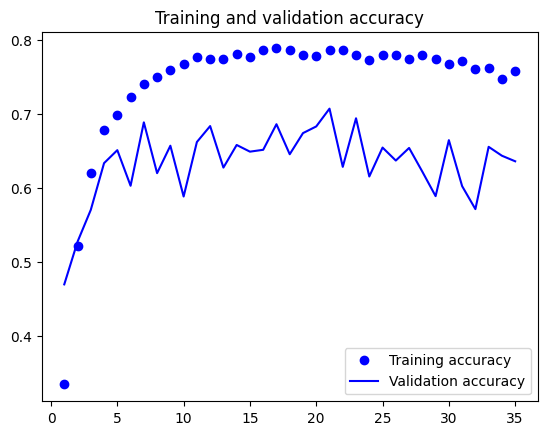

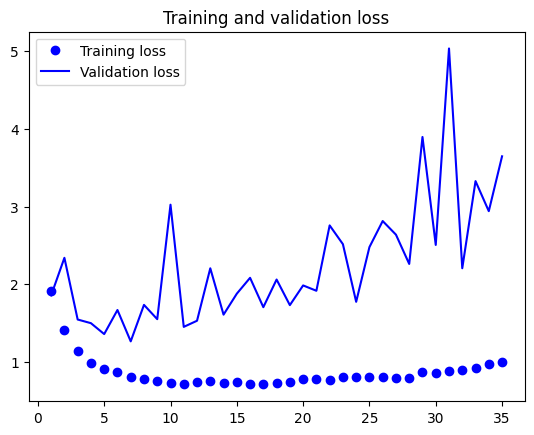

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
### Model 6 Using VGG Pretrained Model

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
        layers.RandomContrast(0.1),
        layers.RandomBrightness(0.1),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),

    ]
)
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

58889256/58889256 [==============================] - 2s 0us/step
This is the number of trainable weights after freezing the conv base: 0


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
438/438 [==============================] - 78s 162ms/step - loss: 6.5042 - accuracy: 0.6733 - val_loss: 9.4267 - val_accuracy: 0.6250
Epoch 2/10
438/438 [==============================] - 71s 160ms/step - loss: 3.4063 - accuracy: 0.8031 - val_loss: 3.3874 - val_accuracy: 0.8140
Epoch 3/10
438/438 [==============================] - 70s 157ms/step - loss: 2.7807 - accuracy: 0.8357 - val_loss: 2.5550 - val_accuracy: 0.8810
Epoch 4/10
438/438 [==============================] - 71s 160ms/step - loss: 2.3554 - accuracy: 0.8503 - val_loss: 4.7513 - val_accuracy: 0.7635
Epoch 5/10
438/438 [==============================] - 70s 159ms/step - loss: 2.0082 - accuracy: 0.8643 - val_loss: 1.9391 - val_accuracy: 0.8925
Epoch 6/10
438/438 [==============================] - 70s 158ms/step - loss: 1.8037 - accuracy: 0.8736 - val_loss: 2.3173 - val_accuracy: 0.8605
Epoch 7/10
438/438 [==============================] - 68s 154ms/step - loss: 1.6880 - accuracy: 0.8704 - val_loss: 2.1084 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 9s 123ms/step - loss: 1.8626 - accuracy: 0.8430
Test accuracy: 0.843


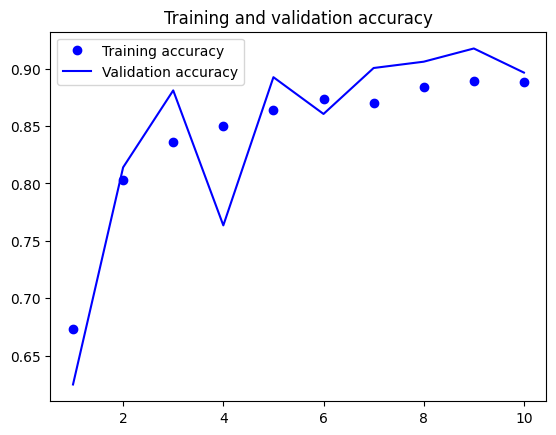

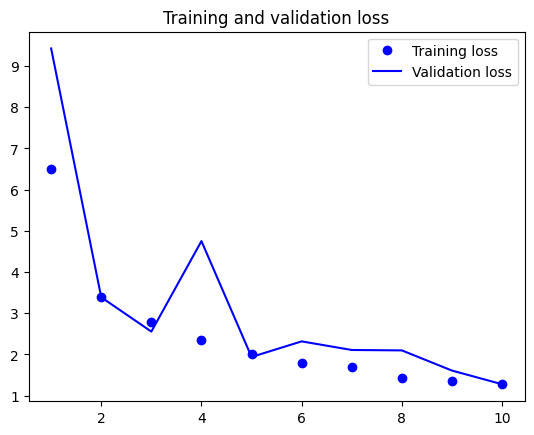

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
#freeze all the layers except the last 2.
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

for layer in conv_base.layers[:-2]:
  layer.trainable = False
for layer in conv_base.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7bb3cc72fdc0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb3522c4ac0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb3ce7a43d0> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7bb352256d40> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb353c902e0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb352698670> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7bb3522c7160> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb3cc72e7a0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb3522c71f0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb353b04fa0> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7bb3522c66b0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb3522c7970> False
<keras.src.layers.convolutional.conv2d.Conv2D ob

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_tune_two.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/15
438/438 [==============================] - 73s 161ms/step - loss: 1.4270 - accuracy: 0.7706 - val_loss: 0.7338 - val_accuracy: 0.8340
Epoch 2/15
438/438 [==============================] - 73s 165ms/step - loss: 0.4820 - accuracy: 0.8800 - val_loss: 0.8775 - val_accuracy: 0.8480
Epoch 3/15
438/438 [==============================] - 71s 160ms/step - loss: 0.3856 - accuracy: 0.9040 - val_loss: 0.6559 - val_accuracy: 0.8620
Epoch 4/15
438/438 [==============================] - 76s 170ms/step - loss: 0.3077 - accuracy: 0.9286 - val_loss: 0.7854 - val_accuracy: 0.8485
Epoch 5/15
438/438 [==============================] - 72s 162ms/step - loss: 0.2829 - accuracy: 0.9304 - val_loss: 0.8084 - val_accuracy: 0.8625
Epoch 6/15
438/438 [==============================] - 72s 162ms/step - loss: 0.2845 - accuracy: 0.9346 - val_loss: 1.2211 - val_accuracy: 0.8555
Epoch 7/15
438/438 [==============================] - 74s 166ms/step - loss: 0.2523 - accuracy: 0.9409 - val_loss: 1.0468 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 11s 154ms/step - loss: 0.9204 - accuracy: 0.8650
Test accuracy: 0.865


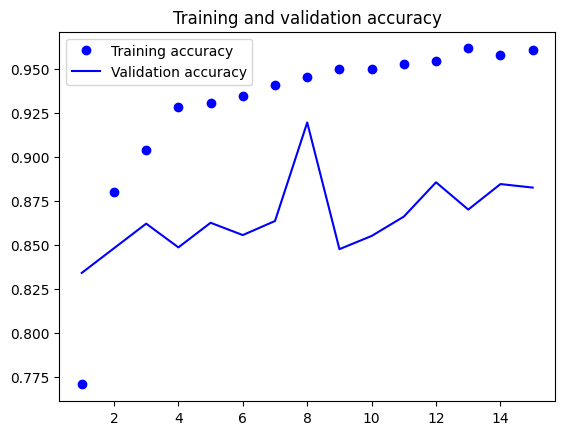

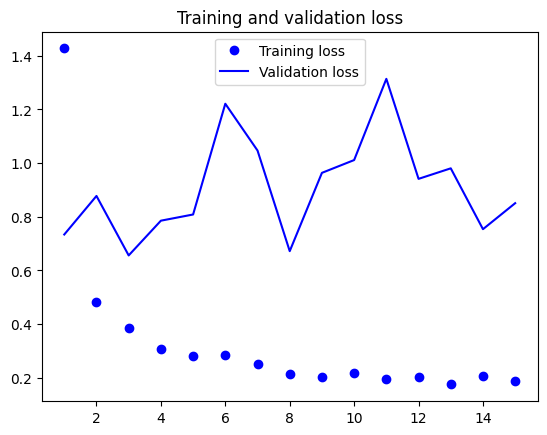

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

1/1 [==============================] - 1s 1s/step
the model predicted class 4
the probs were 
[[ 0.01  0.    0.    0.   99.99  0.    0.    0.    0.    0.  ]]


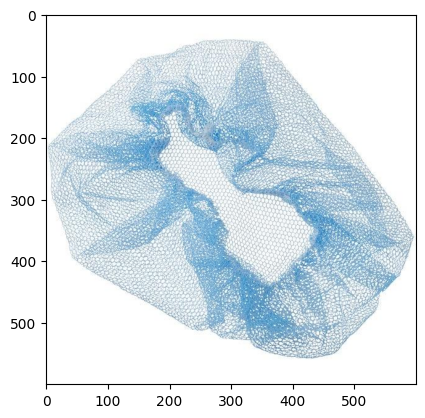

In [ ]:
predict_image('/content/drive/MyDrive/Deep_learning_project/project_data/test/hairnet/hairnet.904.jpg')

In [ ]:
class_mapping

{'facemask': 0,
 'faceshield': 1,
 'glasses': 2,
 'gloves': 3,
 'hairnet': 4,
 'hospital_bed': 5,
 'medical_instrument': 6,
 'monitor': 7,
 'operatinglights': 8,
 'scrubs': 9}

In [ ]:
### Model 8 Resnet50
from keras.applications import ResNet50
Res_base = ResNet50(weights='imagenet', include_top=False)
Res_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(Res_base.trainable_weights))

94765736/94765736 [==============================] - 3s 0us/step
This is the number of trainable weights after freezing the conv base: 0


In [ ]:
Res_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_10[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = Res_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="res_base.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/15
438/438 [==============================] - 83s 175ms/step - loss: 62.0106 - accuracy: 0.1724 - val_loss: 32.6384 - val_accuracy: 0.1955
Epoch 2/15
438/438 [==============================] - 79s 177ms/step - loss: 25.0514 - accuracy: 0.2233 - val_loss: 16.8804 - val_accuracy: 0.3085
Epoch 3/15
438/438 [==============================] - 75s 169ms/step - loss: 6.4299 - accuracy: 0.2310 - val_loss: 4.4304 - val_accuracy: 0.2080
Epoch 4/15
438/438 [==============================] - 81s 183ms/step - loss: 3.6219 - accuracy: 0.2196 - val_loss: 3.9258 - val_accuracy: 0.1965
Epoch 5/15
438/438 [==============================] - 78s 175ms/step - loss: 3.6262 - accuracy: 0.2291 - val_loss: 5.0647 - val_accuracy: 0.1980
Epoch 6/15
438/438 [==============================] - 72s 162ms/step - loss: 3.6098 - accuracy: 0.2500 - val_loss: 5.8099 - val_accuracy: 0.1980
Epoch 7/15
438/438 [==============================] - 74s 167ms/step - loss: 3.5756 - accuracy: 0.2509 - val_loss: 6.4564 - va

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 10s 148ms/step - loss: 6.5570 - accuracy: 0.2610
Test accuracy: 0.261


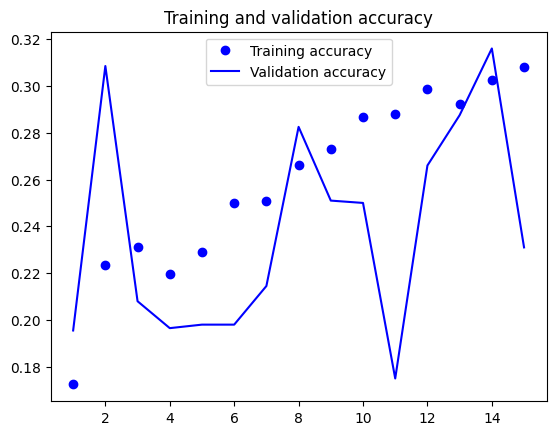

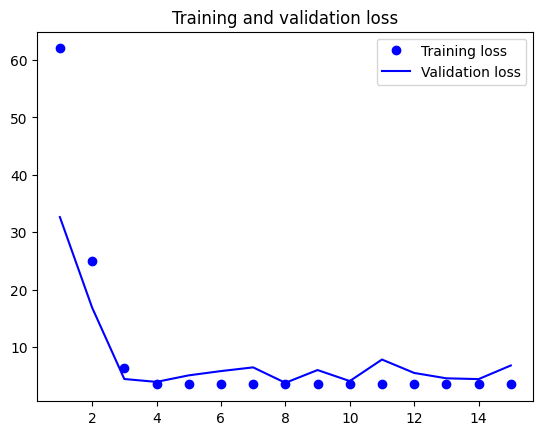

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
### Model 9 InceptionV3
from keras.applications import InceptionV3
inception_base = InceptionV3(weights='imagenet', include_top=False)
inception_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(inception_base.trainable_weights))

87910968/87910968 [==============================] - 3s 0us/step
This is the number of trainable weights after freezing the conv base: 0


In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = inception_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="inception_base.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
438/438 [==============================] - 86s 175ms/step - loss: 26.4244 - accuracy: 0.7931 - val_loss: 25.0265 - val_accuracy: 0.8220
Epoch 2/20
438/438 [==============================] - 74s 167ms/step - loss: 14.5560 - accuracy: 0.8901 - val_loss: 15.5586 - val_accuracy: 0.9105
Epoch 3/20
438/438 [==============================] - 70s 159ms/step - loss: 13.0700 - accuracy: 0.9053 - val_loss: 21.1454 - val_accuracy: 0.8705
Epoch 4/20
438/438 [==============================] - 73s 165ms/step - loss: 11.4069 - accuracy: 0.9186 - val_loss: 9.2819 - val_accuracy: 0.9380
Epoch 5/20
438/438 [==============================] - 75s 168ms/step - loss: 10.2627 - accuracy: 0.9251 - val_loss: 19.3401 - val_accuracy: 0.8900
Epoch 6/20
438/438 [==============================] - 75s 169ms/step - loss: 9.8010 - accuracy: 0.9277 - val_loss: 9.5797 - val_accuracy: 0.9300
Epoch 7/20
438/438 [==============================] - 72s 164ms/step - loss: 7.9377 - accuracy: 0.9369 - val_loss: 12.244

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 9s 133ms/step - loss: 12.0786 - accuracy: 0.9330
Test accuracy: 0.933


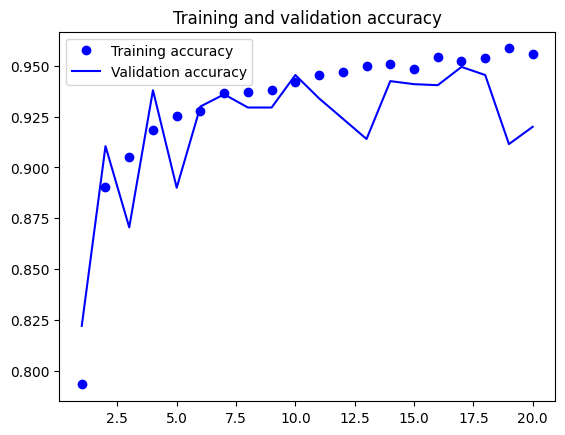

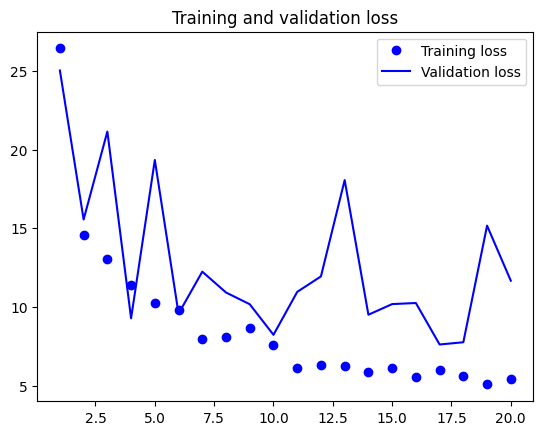

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
for layer in inception_base.layers[:-2]:
  layer.trainable = False
for layer in inception_base.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7bb3b7714190> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb3500fdf30> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7bb3cfceeec0> False
<keras.src.layers.core.activation.Activation object at 0x7bb353ccb070> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb353bf0250> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7bb3532218d0> False
<keras.src.layers.core.activation.Activation object at 0x7bb3531ce020> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb3531ce6b0> False
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7bb3cc39b4c0> False
<keras.src.layers.core.activation.Activation object at 0x7bb3531edbd0> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7bb3531efca0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7bb35316bd

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = inception_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="inception_base_TUNE.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
438/438 [==============================] - 81s 169ms/step - loss: 26.4671 - accuracy: 0.7956 - val_loss: 28.1067 - val_accuracy: 0.8160
Epoch 2/30
438/438 [==============================] - 76s 170ms/step - loss: 16.1743 - accuracy: 0.8863 - val_loss: 13.4458 - val_accuracy: 0.9055
Epoch 3/30
438/438 [==============================] - 72s 163ms/step - loss: 12.5268 - accuracy: 0.9059 - val_loss: 22.0450 - val_accuracy: 0.8710
Epoch 4/30
438/438 [==============================] - 76s 172ms/step - loss: 10.5634 - accuracy: 0.9189 - val_loss: 20.1989 - val_accuracy: 0.8810
Epoch 5/30
438/438 [==============================] - 74s 166ms/step - loss: 9.8718 - accuracy: 0.9266 - val_loss: 12.2468 - val_accuracy: 0.9220
Epoch 6/30
438/438 [==============================] - 77s 174ms/step - loss: 8.6854 - accuracy: 0.9331 - val_loss: 10.3986 - val_accuracy: 0.9315
Epoch 7/30
438/438 [==============================] - 74s 167ms/step - loss: 8.8003 - accuracy: 0.9344 - val_loss: 13.11

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 11s 155ms/step - loss: 13.1724 - accuracy: 0.9230
Test accuracy: 0.923


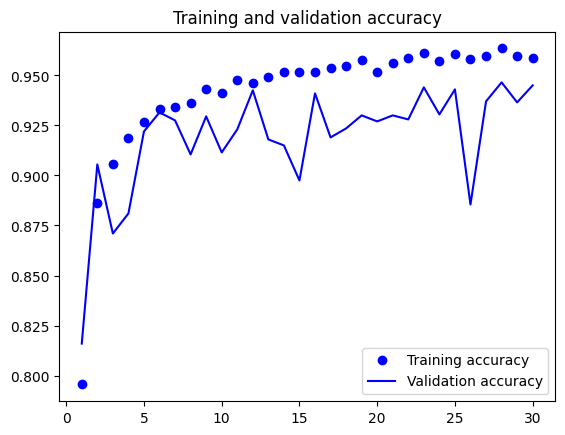

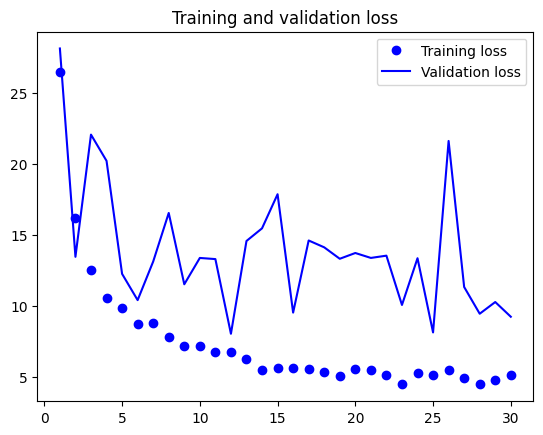

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 28ms/step
the model predicted class 3
The model predicted class: gloves


Text(0.5, 1.0, 'Image Predicted: gloves\nActual Image: gloves')

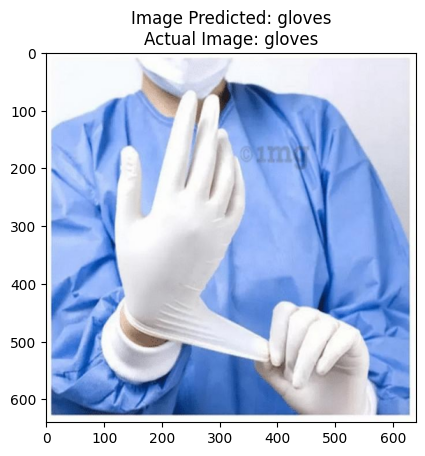

In [ ]:
inverse_class_mapping = {v: k for k, v in class_mapping.items()}
ds='/content/drive/MyDrive/Deep_learning_project/project_data/test/gloves/gloves.904.jpg'
img = Image.open(ds)
img = img.resize((224, 224))
img_array = np.array(img)
img_array
img_fix = img_array.reshape(1, 224, 224, 3)
img_fix
img_fixed  = img_fix.astype('float32')
img_fixed
img_fixed.shape
result = model.predict(img_fixed)
rtm=np.argmax(result)
my_arr_percent = result * 100
actual_class = ds.split('/')[-2]
predicted_class_name = inverse_class_mapping [rtm]
print(f"the model predicted class {rtm}")
print(f"The model predicted class: {predicted_class_name}")
ds_sample=cv2.imread(ds)
plt.imshow(ds_sample[:,:,::-1])
plt.title(f"Image Predicted: {predicted_class_name}\nActual Image: {actual_class}")

In [ ]:
def make_img_pred(ds='/content/drive/MyDrive/Deep_learning_project/project_data/test/gloves/gloves.904.jpg'):
  img = Image.open(ds)
  img = img.resize((224, 224))
  img_array = np.array(img)
  img_array
  img_fix = img_array.reshape(1, 224, 224, 3)
  img_fix
  img_fixed  = img_fix.astype('float32')
  img_fixed
  img_fixed.shape
  result = model.predict(img_fixed)
  rtm=np.argmax(result)
  my_arr_percent = result * 100
  actual_class = ds.split('/')[-2]
  predicted_class_name = inverse_class_mapping [rtm]
  print(f"the model predicted class {rtm}")
  print(f"The model predicted class: {predicted_class_name}")
  ds_sample=cv2.imread(ds)
  plt.imshow(ds_sample[:,:,::-1])
  plt.title(f"Image Predicted: {predicted_class_name}\nActual Image: {actual_class}")

1/1 [==============================] - 0s 32ms/step
the model predicted class 0
The model predicted class: facemask


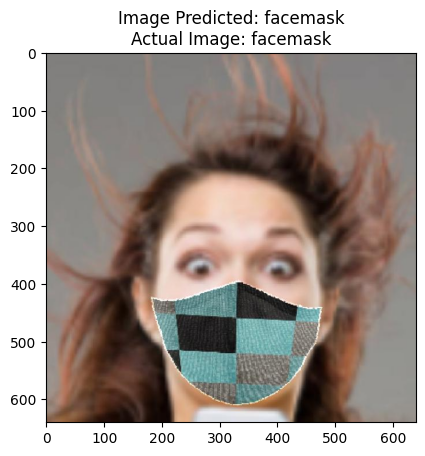

In [ ]:
make_img_pred(ds='/content/drive/MyDrive/Deep_learning_project/project_data/test/facemask/facemask.904.jpg')

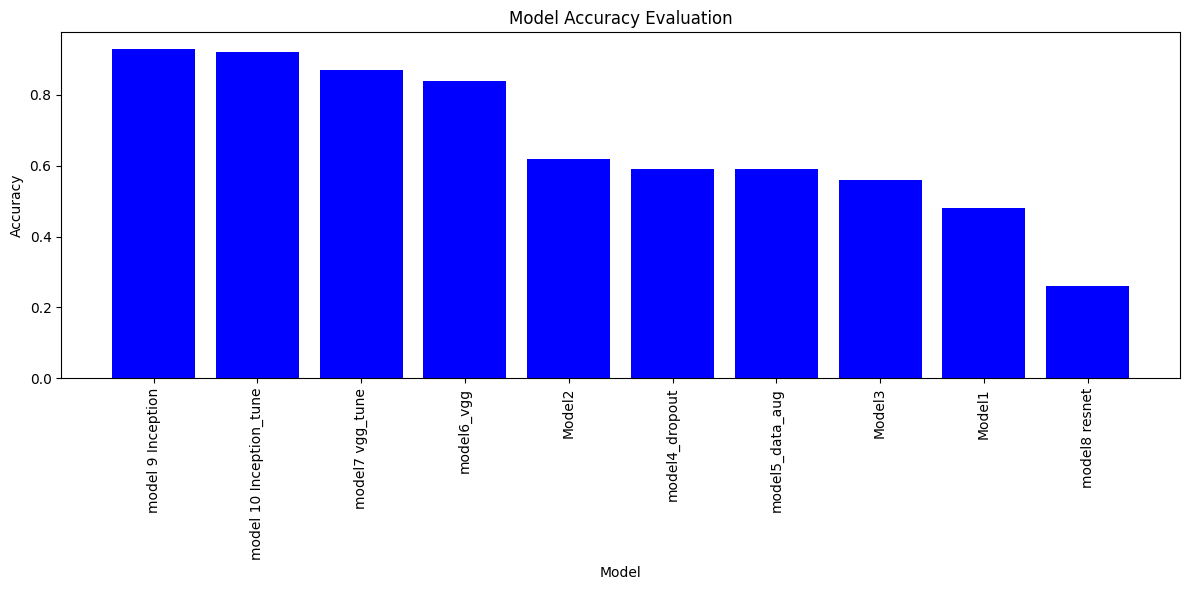

In [ ]:
#Model Comparison Chart
import pandas as pd
import matplotlib.pyplot as plt

data = {"Model": ["Model1", "Model2", "Model3", "model4_dropout", "model5_data_aug", "model6_vgg", "model7 vgg_tune", "model8 resnet", "model 9 Inception", "model 10 Inception_tune"],
       "Accuracy": [.48, .62, .56, .59, .59, .84, .87, .26, .93, .92]}

df = pd.DataFrame(data)
df = df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df['Model'], df['Accuracy'], color='blue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Evaluation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
def predict_images_in_folder(folder_path='/content/drive/MyDrive/Deep_learning_project/project_data/test_data_internet', target_size=(224, 224), threshold=0.5):
    num_rows = 5
    num_cols = 5
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
    subplot_count = 0
    for filename in os.listdir(folder_path):
      if subplot_count >= num_rows * num_cols:
        break
      file_path = os.path.join(folder_path, filename)
      img = load_img(file_path, target_size=target_size)
      img= img_to_array(img)
      numpy_array = img.astype('uint8')
      img = img.reshape(1, 224, 224, 3)
      img = img.astype('float32')
      result = model.predict(img)
      rtm=np.argmax(result)
      my_arr_percent = result * 100
      actual_class = filename.split('.')[0]
      predicted_class_name = inverse_class_mapping [rtm]
      print(f"the model predicted class {rtm}")
      print(f"The model predicted class: {predicted_class_name}")
      print(f"actual class is {actual_class}")
      ax = plt.subplot(num_rows, num_cols, subplot_count + 1)
      ax.imshow(numpy_array)
      ax.set_title(f"Image Predicted: {predicted_class_name}\nActual Image: {actual_class}")
      ax.axis('off')
      subplot_count += 1
    plt.tight_layout()
    plt.show()




1/1 [==============================] - 0s 29ms/step
the model predicted class 0
The model predicted class: facemask
actual class is facemask
1/1 [==============================] - 0s 28ms/step
the model predicted class 0
The model predicted class: facemask
actual class is facemask
1/1 [==============================] - 0s 28ms/step
the model predicted class 4
The model predicted class: hairnet
actual class is facemask
1/1 [==============================] - 0s 27ms/step
the model predicted class 3
The model predicted class: gloves
actual class is gloves
1/1 [==============================] - 0s 34ms/step
the model predicted class 1
The model predicted class: faceshield
actual class is faceshield
1/1 [==============================] - 0s 27ms/step
the model predicted class 1
The model predicted class: faceshield
actual class is faceshield
1/1 [==============================] - 0s 31ms/step
the model predicted class 3
The model predicted class: gloves
actual class is gloves
1/1 [=========

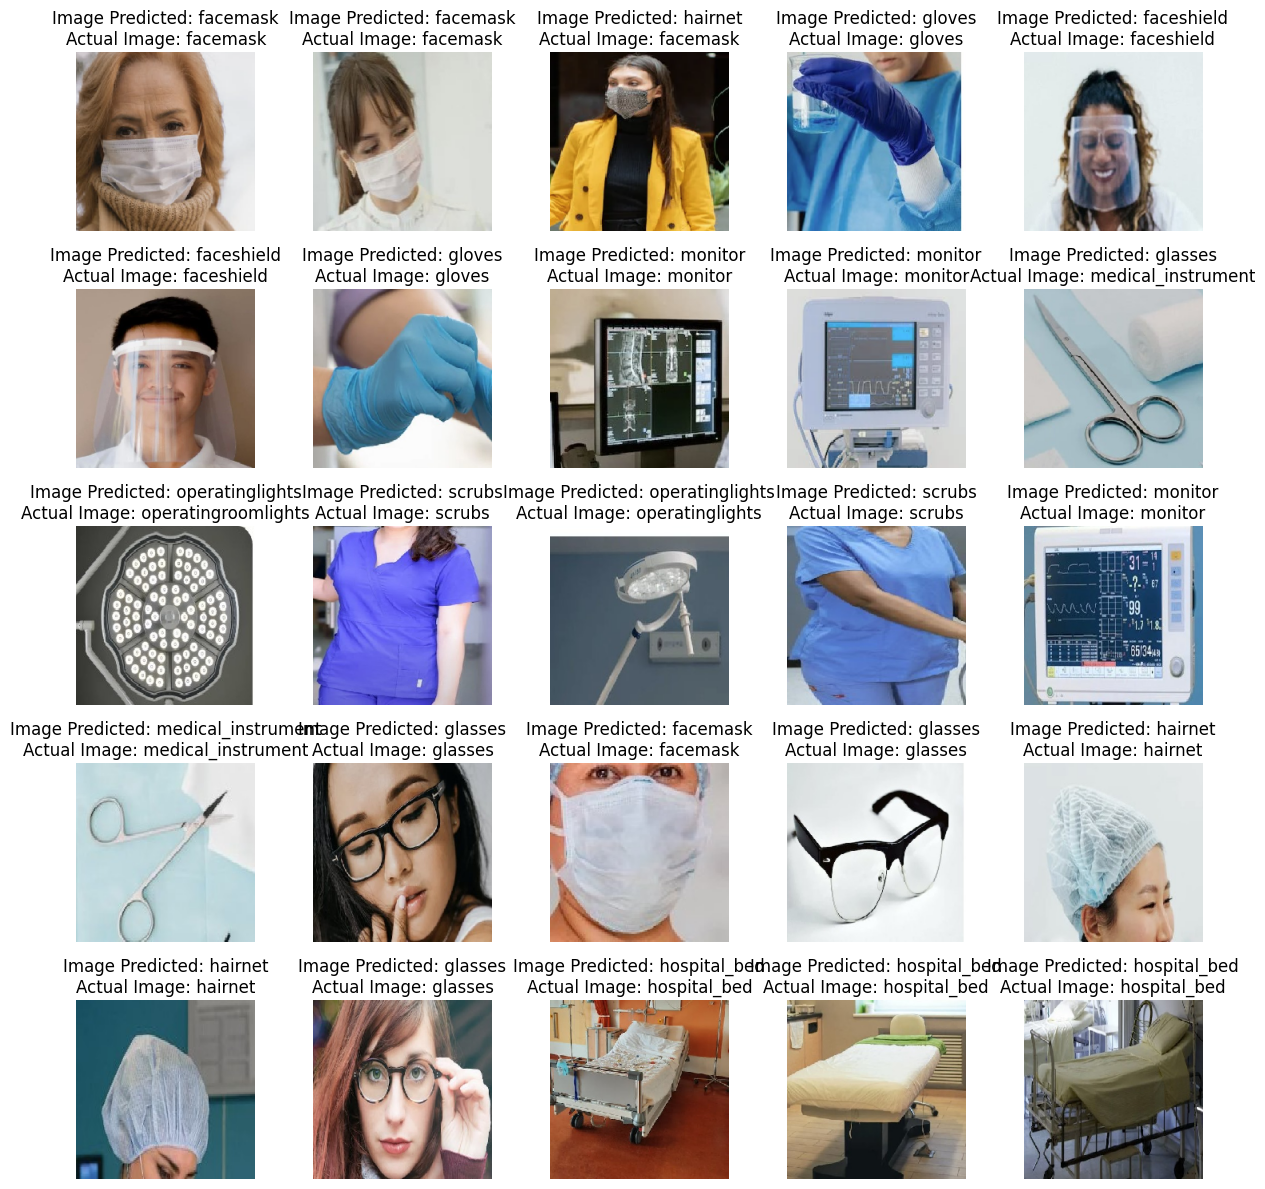

In [ ]:
predict_images_in_folder()

In [ ]:
### need to set shuffle to false to actually extract labels if not get a random set each time
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(224, 224),
    batch_size=16,
    shuffle=False)

Found 1000 files belonging to 10 classes.


In [ ]:
x=0
z=0
my_labels=[]

for data_batch, labels_batch in test_dataset:
    for row in range(16):
        amts=labels_batch[x]
        amts= amts.numpy()
        #print(amts)
        x+=1
        my_labels.append(amts)
    x=0
    print(labels_batch)

tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(16,), dtype=int32)
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(16,), dtype=int32)
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(16,), dtype=int32)
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(16,), dtype=int32)
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(16,), dtype=int32)
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(16,), dtype=int32)
tf.Tensor([0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1], shape=(16,), dtype=int32)
tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(16,), dtype=int32)
tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(16,), dtype=int32)
tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(16,), dtype=int32)
tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(16,), dtype=int32)
tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(16,), dtype=int32)
tf.Tensor([1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2], shape=(16,), dtype=int32)
tf.Tensor([2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2], shape=(16,), dtype=int32)
tf.Ten

InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:GPU:0}} slice index 8 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

In [ ]:
predictions = model.predict(test_dataset)




63/63 [==============================] - 11s 150ms/step


In [ ]:
len(predicted_labels)

1000

In [ ]:
predicted_labels.count(0)

78

In [ ]:
predicted_labels = [np.argmax(i) for i in predictions]

In [ ]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=my_labels, predictions=predicted_labels)

In [ ]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 78,   6,  13,   0,   1,   0,   1,   0,   0,   1],
       [  0, 100,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,  98,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,  89,   1,   0,   8,   0,   0,   1],
       [  0,   0,   4,   0,  96,   0,   0,   0,   0,   0],
       [  0,  11,   5,   0,   0,  83,   0,   0,   1,   0],
       [  0,   2,  12,   0,   0,   0,  86,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 100,   0,   0],
       [  0,   0,   2,   0,   0,   3,   0,   0,  95,   0],
       [  0,   2,   0,   0,   0,   0,   0,   0,   0,  98]], dtype=int32)>

In [ ]:
class_mapping

{'facemask': 0,
 'faceshield': 1,
 'glasses': 2,
 'gloves': 3,
 'hairnet': 4,
 'hospital_bed': 5,
 'medical_instrument': 6,
 'monitor': 7,
 'operatinglights': 8,
 'scrubs': 9}

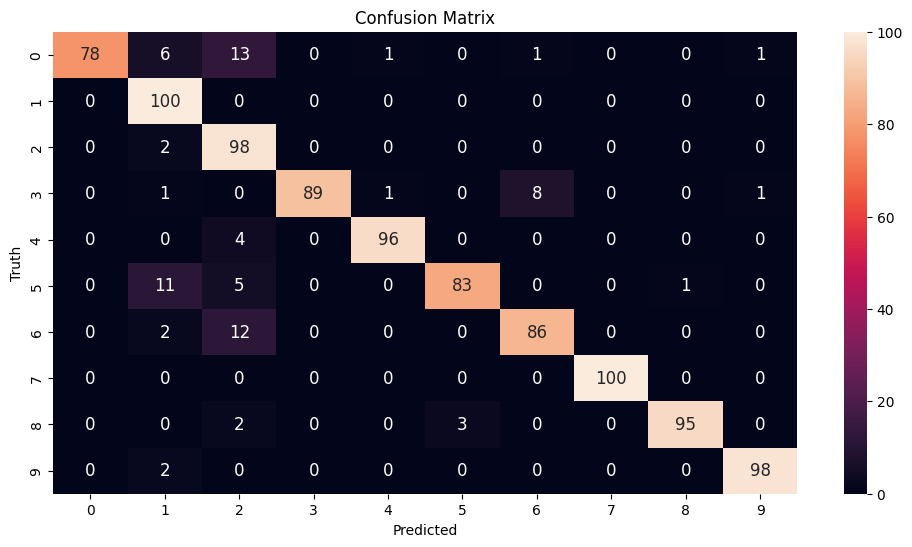

In [ ]:
plt.figure(figsize=[12, 6])
import seaborn as sn
sn.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

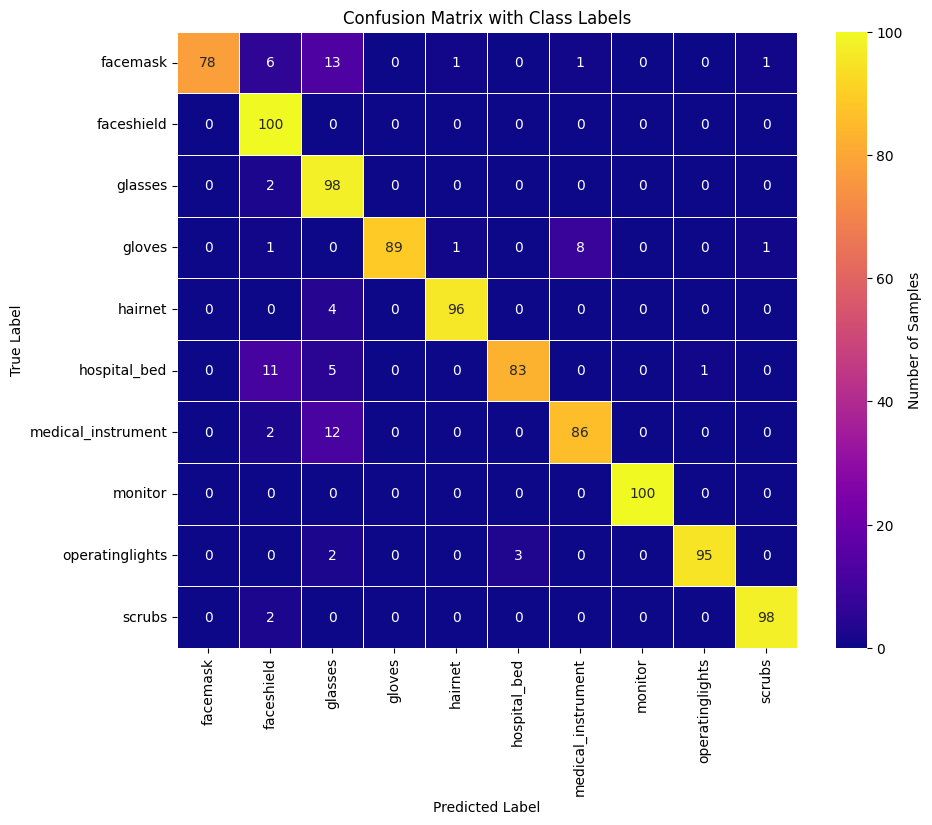

In [ ]:
import pandas as pd
cm_df = pd.DataFrame(cm.numpy(), index=class_mapping.keys(), columns=class_mapping.keys())

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sn.heatmap(cm_df, annot=True, cmap="plasma", fmt="d", linewidths=.5, cbar_kws={'label': 'Number of Samples'})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with Class Labels')
plt.show()

1/1 [==============================] - 0s 26ms/step


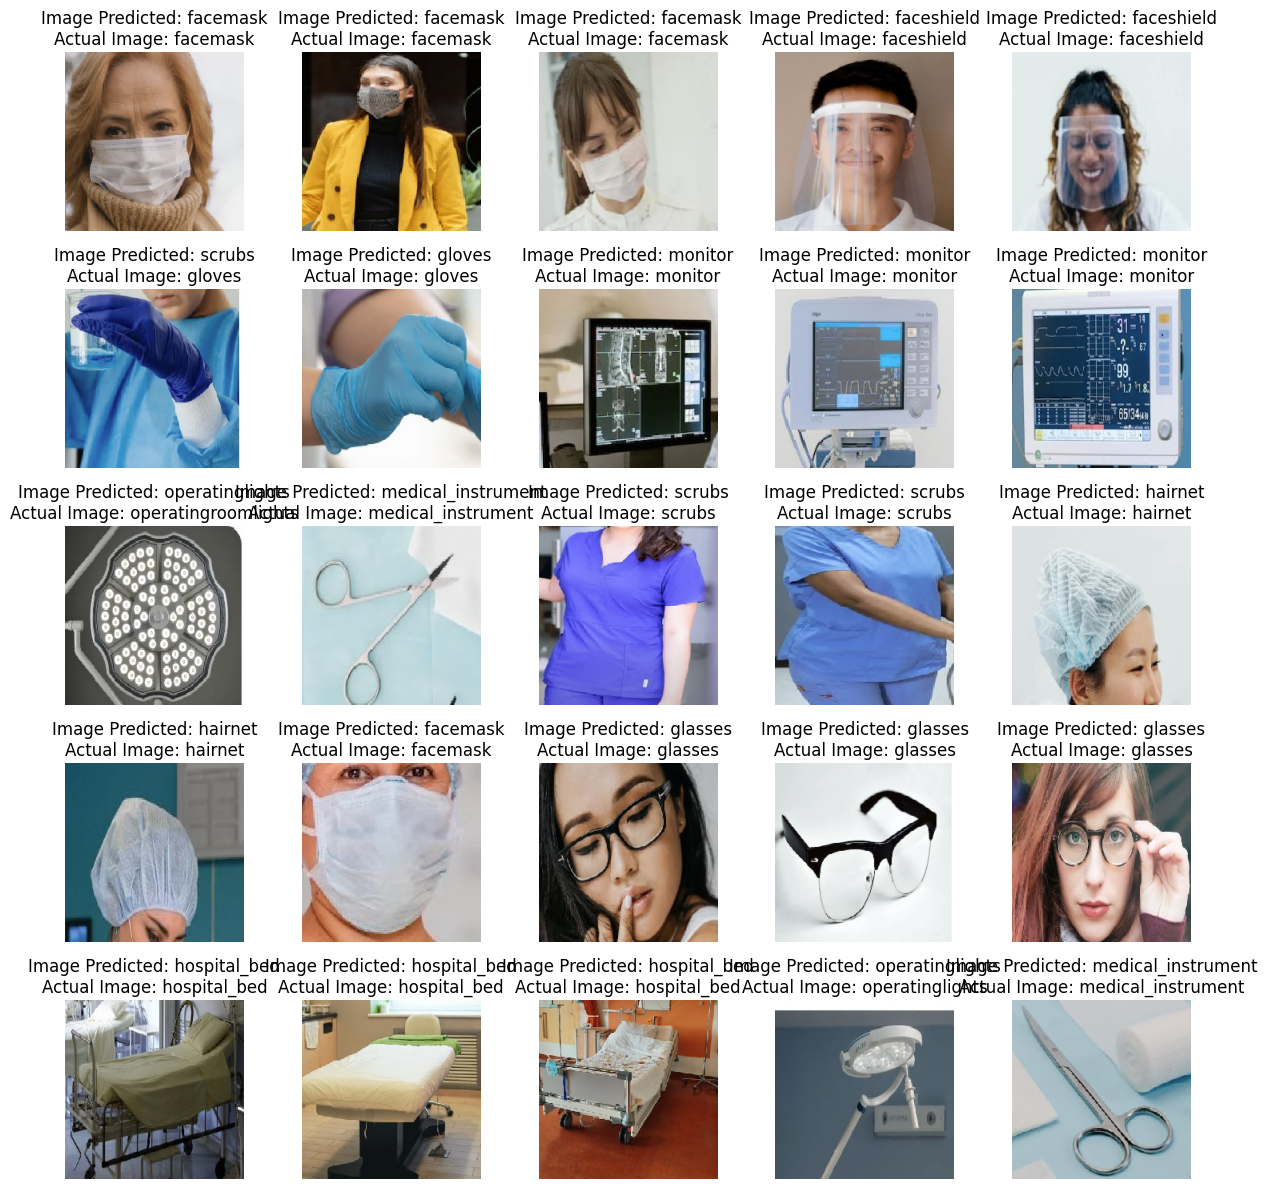

In [ ]:
inverse_class_mapping = {v: k for k, v in class_mapping.items()}
def predict_images_in_folder(folder_path='/content/drive/MyDrive/Deep_learning_project/project_data/test_data_internet', target_size=(224, 224), threshold=0.5):
    num_rows = 5
    num_cols = 5
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
    subplot_count = 0
    for filename in os.listdir(folder_path):
      if subplot_count >= num_rows * num_cols:
        break
      file_path = os.path.join(folder_path, filename)
      img = load_img(file_path, target_size=target_size)
      img= img_to_array(img)
      numpy_array = img.astype('uint8')
      img = img.reshape(1, 224, 224, 3)
      img = img.astype('float32')
      result = model.predict(img)
      rtm=np.argmax(result)
      my_arr_percent = result * 100
      actual_class = filename.split('.')[0]
      predicted_class_name = inverse_class_mapping [rtm]
      #print(f"the model predicted class {rtm}")
      #print(f"The model predicted class: {predicted_class_name}")
      #print(f"actual class is {actual_class}")
      ax = plt.subplot(num_rows, num_cols, subplot_count + 1)
      ax.imshow(numpy_array)
      ax.set_title(f"Image Predicted: {predicted_class_name}\nActual Image: {actual_class}")
      ax.axis('off')
      subplot_count += 1
    plt.tight_layout()
    plt.show()

predict_images_in_folder()